# LOGISTIC REGRESSION

### 1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, 
                           precision_score, f1_score, roc_curve, roc_auc_score,
                           classification_report)
import statsmodels.api as sm

In [2]:

# Load data
df = pd.read_csv("diabetes.csv")
print("Dataset shape:", df.shape)
print(df['Outcome'].value_counts())

Dataset shape: (768, 9)
Outcome
0    500
1    268
Name: count, dtype: int64


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Define features and target
X_vars = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

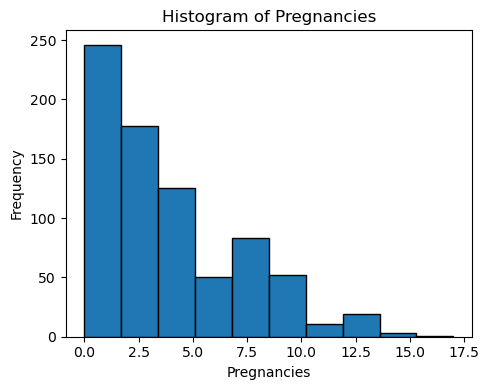

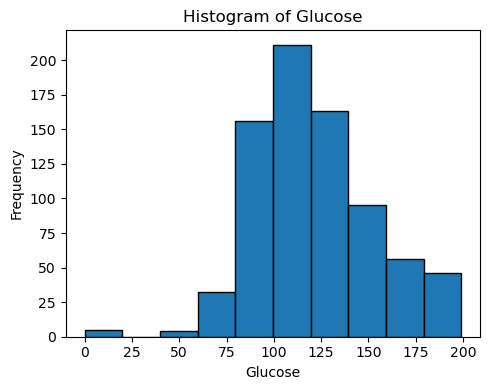

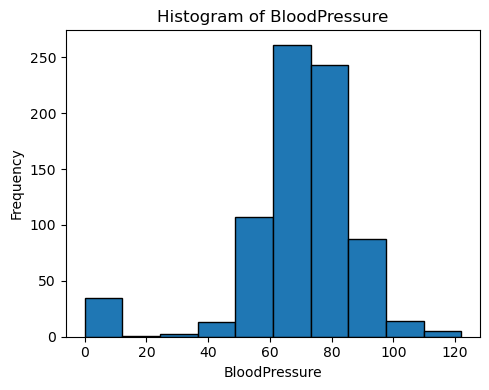

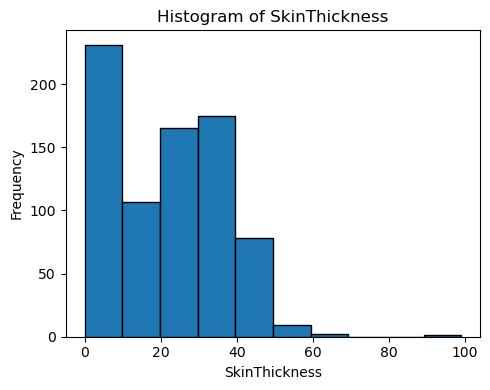

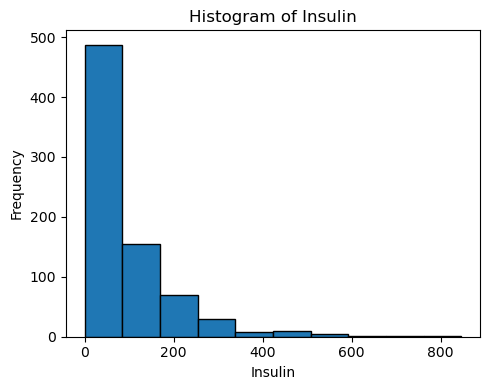

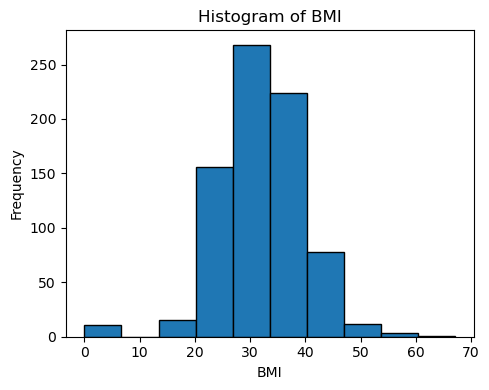

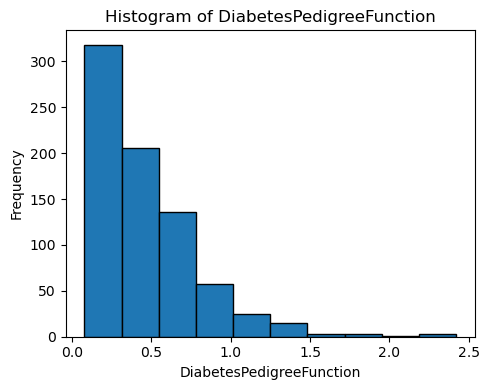

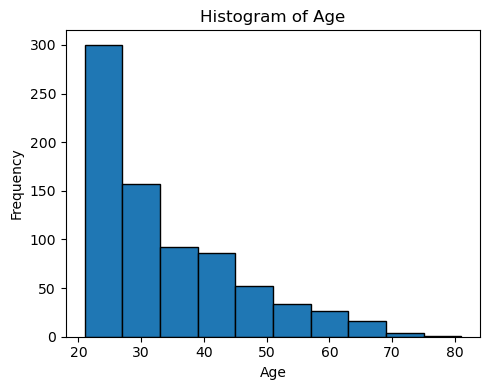

In [7]:
# ---------------------------------------------------
#  HISTOGRAMS 
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in X_vars.columns:
    plt.figure(figsize=(5, 4))        # create new figure for each plot
    plt.hist(X_vars[col], edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

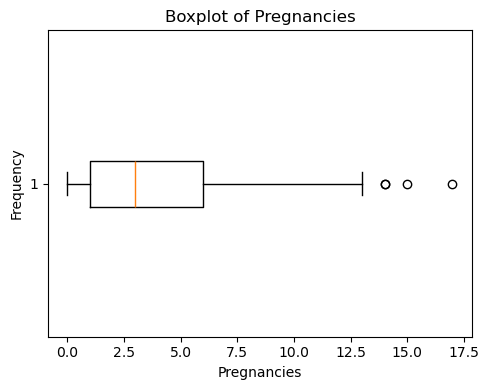

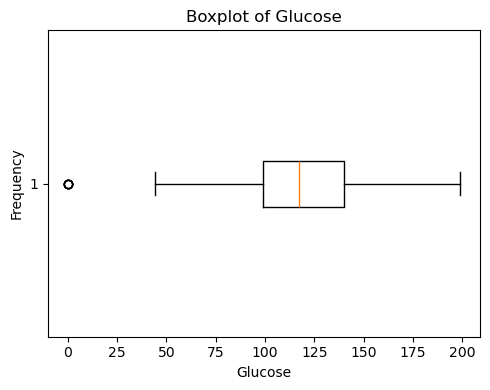

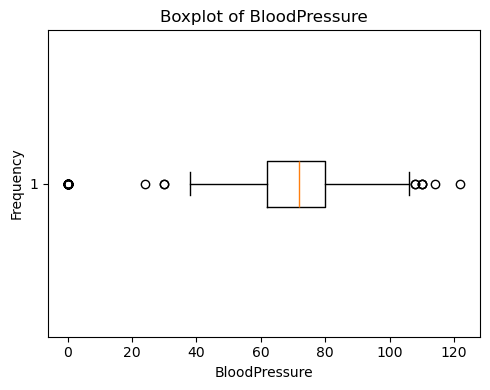

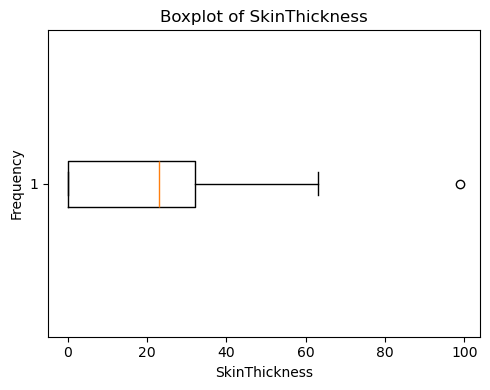

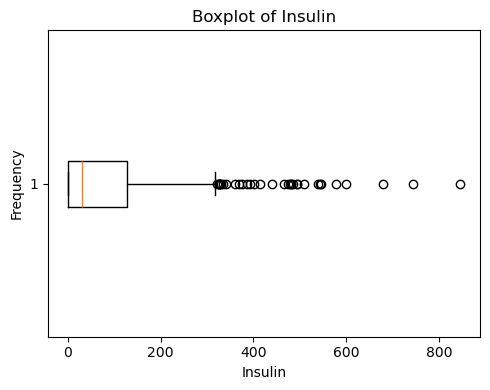

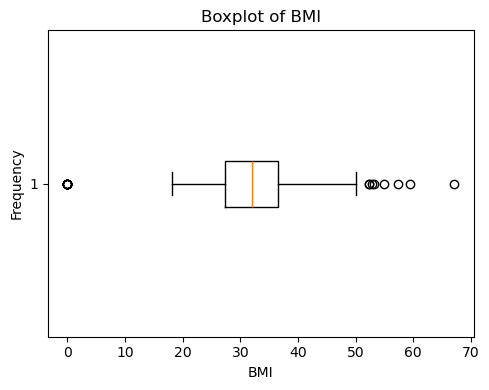

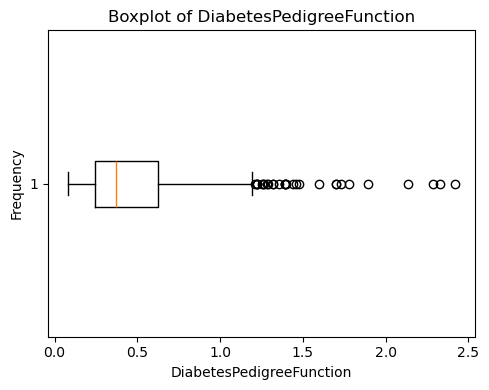

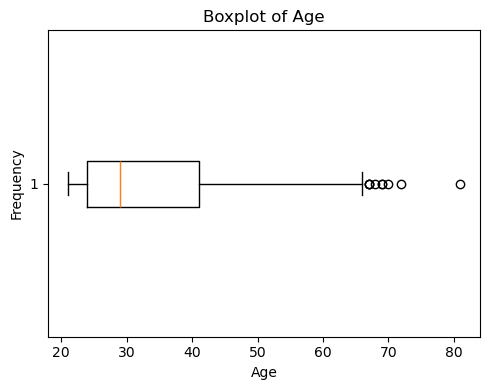

In [8]:
# ---------------------------------------------------
#  Boxplot
# ---------------------------------------------------
import matplotlib.pyplot as plt
for col in X_vars.columns:
    plt.figure(figsize=(5, 4))        
    plt.boxplot(X_vars[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

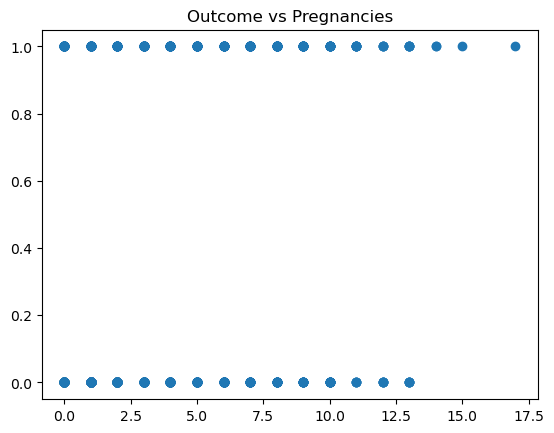

<Figure size 400x400 with 0 Axes>

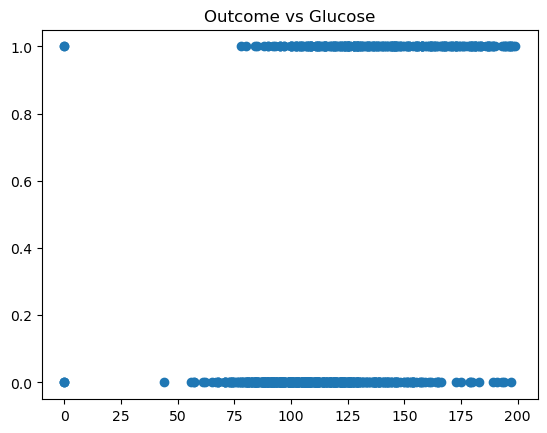

<Figure size 400x400 with 0 Axes>

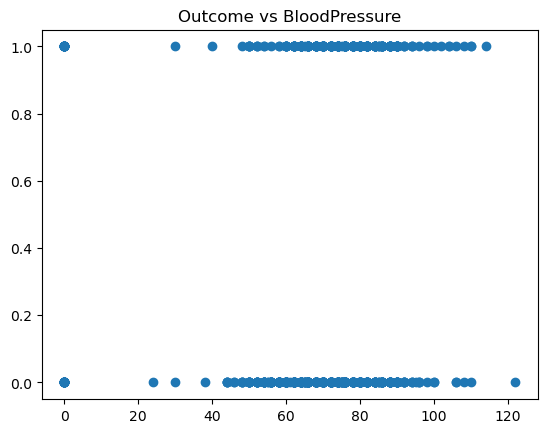

<Figure size 400x400 with 0 Axes>

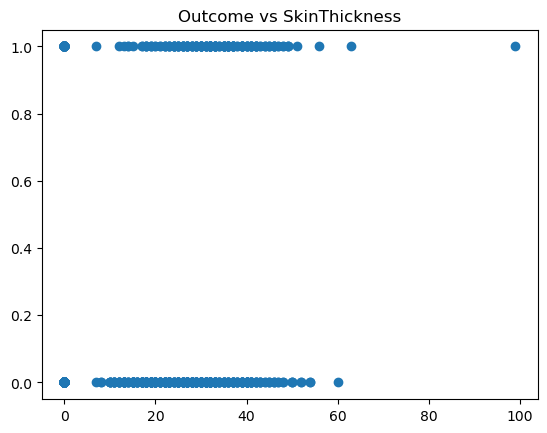

<Figure size 400x400 with 0 Axes>

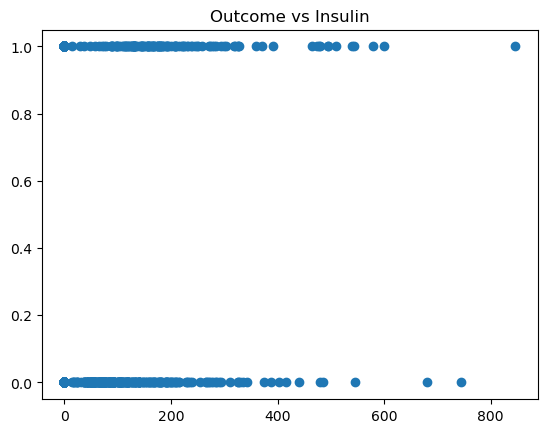

<Figure size 400x400 with 0 Axes>

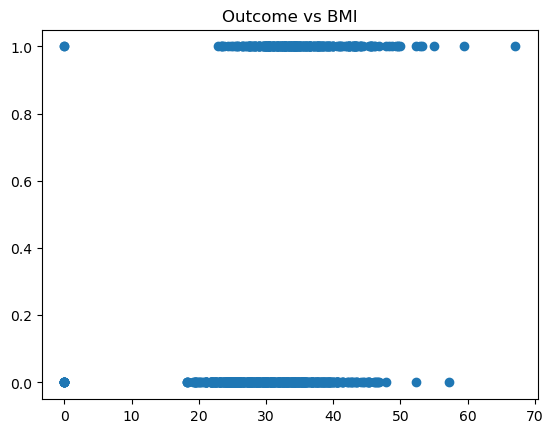

<Figure size 400x400 with 0 Axes>

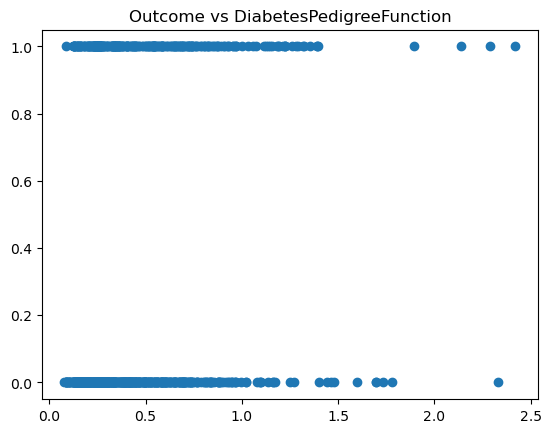

<Figure size 400x400 with 0 Axes>

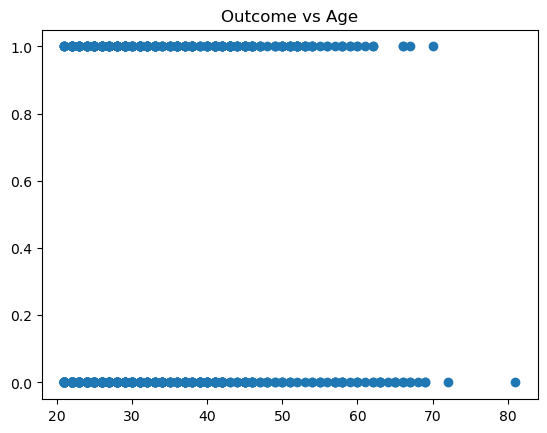

<Figure size 400x400 with 0 Axes>

In [9]:
# ---------------------------------------------------
#  SCATTER PLOT
# ---------------------------------------------------
for col in X_vars:
    plt.scatter(X_vars[col],df["Outcome"])
    plt.title(f"Outcome vs {col}")
    plt.figure(figsize=(4,4))
    plt.show()

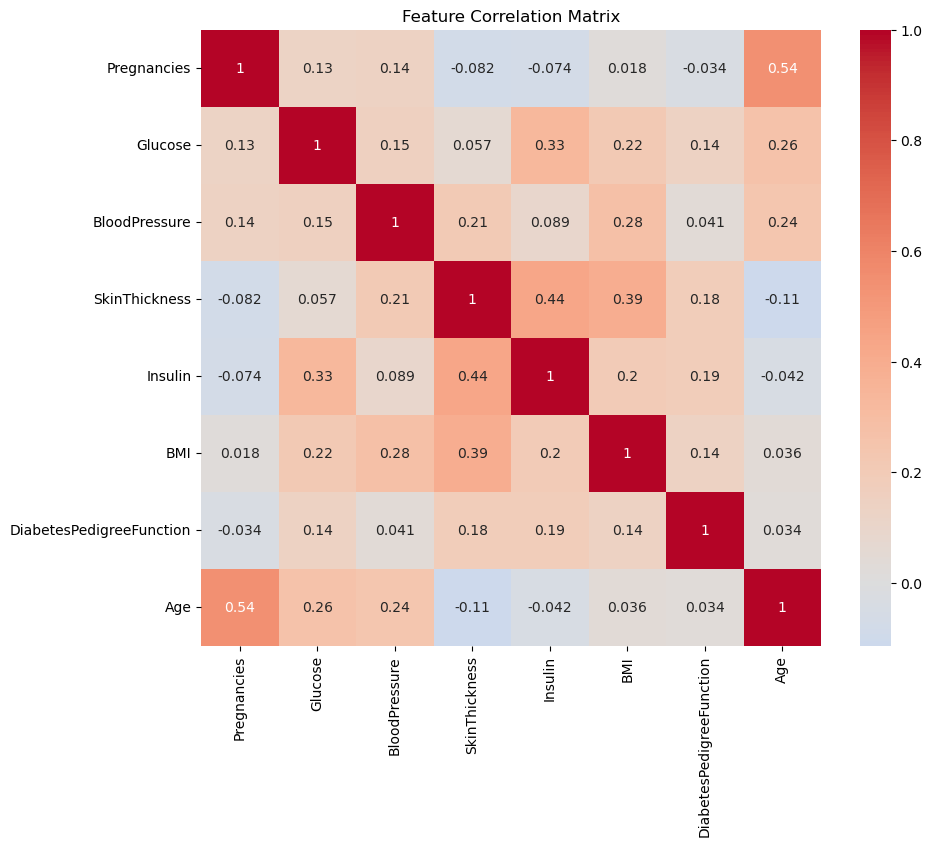

In [10]:
# ---------------------------------------------------
#  CORRELATION HEATMAP
# ---------------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(X_vars.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()


### 2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.


In [11]:
# -----------------------------------------
# DATA PREPROCESSING
# -----------------------------------------

# Handling missing values
df = df.fillna(df.median(numeric_only=True))   # Simple imputation for numerical columns

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [12]:
# ---------------------------------------------------
#  TRAIN-TEST SPLIT (CRITICAL FIX)
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_vars, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.


In [14]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_vars,y)

C:\Users\visha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
df["Y_pred"]=LR.predict(X_vars)
df["Y_pred"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    0
767    0
Name: Y_pred, Length: 768, dtype: int64

### 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.


In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y,df["Y_pred"])
print("Confusion matrix" ,'\n',cm)

acc=accuracy_score(y,df["Y_pred"])
print("Accuracy Score",acc)

Confusion matrix 
 [[447  53]
 [114 154]]
Accuracy Score 0.7825520833333334


In [17]:
from sklearn.metrics import recall_score,precision_score,f1_score
import numpy as np
recall=recall_score(y,df["Y_pred"])
print("recall score : ",np.round(recall,3))


preci=precision_score(y,df["Y_pred"])
print("Precision :  ",np.round(preci,3))

f1=f1_score(y,df["Y_pred"])
print("f1_score : ",np.round(f1,3))

sp=recall_score(df["Y_pred"],y)
print("Specificty score : ",np.round(sp,3))

recall score :  0.575
Precision :   0.744
f1_score :  0.648
Specificty score :  0.744


In [18]:
# ---------------------------------------------------
#  HYPERPARAMETER TUNING
# ---------------------------------------------------
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression(random_state=42, max_iter=1000)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lr = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best CV ROC-AUC:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.8324100221483942



=== TEST SET PERFORMANCE ===
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1-Score: 0.5454545454545454

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



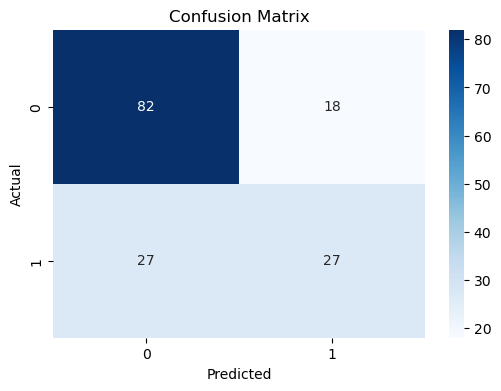

In [19]:
#  MODEL EVALUATION ON TEST SET
# ---------------------------------------------------
y_pred = best_lr.predict(X_test_scaled)
y_pred_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("\n=== TEST SET PERFORMANCE ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).


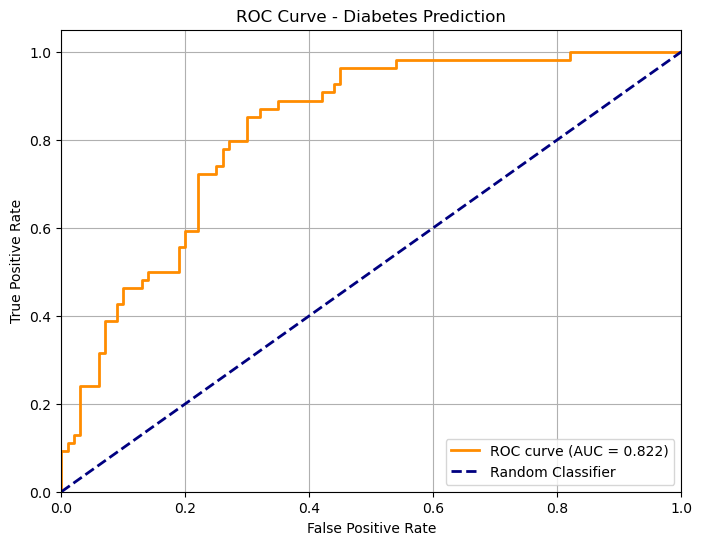

In [20]:
# ---------------------------------------------------
#  ROC CURVE 
# ---------------------------------------------------
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes Prediction')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [21]:
coeffs = pd.DataFrame({
    "Feature": X_vars.columns,
    "Coefficient": LR.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeffs)

                    Feature  Coefficient
6  DiabetesPedigreeFunction     1.419040
0               Pregnancies     0.117252
5                       BMI     0.077203
1                   Glucose     0.033599
7                       Age     0.010036
4                   Insulin    -0.001240
3             SkinThickness    -0.001271
2             BloodPressure    -0.014087


In [22]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_vars)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Fri, 26 Dec 2025   Pseudo R-squ.:                  0.2718
Time:                        18:04:42   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809

This logistic regression output shows that the model fits the data well and is statistically significant overall. Several variables strongly predict the likelihood of diabetes: Glucose, BMI, Pregnancies, and DiabetesPedigreeFunction all have positive and significant coefficients, meaning higher values in these features increase the chances of having diabetes. BloodPressure has a small but significant negative effect, suggesting higher blood pressure slightly reduces the predicted risk in this model. Other variables—SkinThickness, Insulin, and Age—are not statistically significant because their p-values are greater than 0.05, meaning they do not reliably contribute to predicting diabetes in this dataset. Overall, glucose level and BMI are the strongest predictors of the outcome.

### Interview Questions:
### 1. What is the difference between precision and recall?
   Precision tells us how many of the items labeled as positive by the model are actually positive. It answers the question: “Of all the times the model predicted positive, how often was it right?”
Recall tells us how many of the actual positive items the model successfully identified. It answers the question: “Of all the true positives in the data, how many did the model find?”
In simple terms, precision is about the accuracy of positive predictions, while recall is about capturing as many positives as possible.


### 2. What is cross-validation, and why is it important in binary classification?
   Cross-validation is a method to assess how well a model will perform on unseen data by splitting the data into multiple parts (folds), training on some parts and testing on others repeatedly. It helps ensure the model's results are reliable and not just tailored to a specific subset. In binary classification, cross-validation is vital to avoid overfitting, better estimate model performance, and ensure that the model generalizes well to new data rather than just memorizing the training examples.


In [23]:
from pickle import dump

In [27]:
dump(LR, open('LR.pkl', 'wb'))